In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('./data/bluenile_round_13k.csv')
print(df.shape)
df.drop('Unnamed: 0',axis=1,inplace=True)

(72231, 17)


# Data Cleaning

In [3]:
df = df.drop_duplicates()

In [4]:
df

,Shape,Price,Carat,Color,Clarity,Polish,Symmetry,Fluorescence,Depth,Table,L/W,Price/Ct,Culet,Stock No.,Delivery Date,Cut
0,Round,$500,0.30,G,SI2,Excellent,Excellent,None,62.3,56.0,1.00,"$1,667",None,LD04826820,Apr 19,Ideal
1,Round,$500,0.34,K,VVS1,Good,Very Good,None,64.3,57.0,1.01,"$1,471",None,LD06487217,May 4,Good
2,Round,$500,0.37,I,SI1,Very Good,Good,Faint,63.7,55.0,1.01,"$1,351",None,LD10690002,May 26,Very Good
3,Round,$500,0.40,K,VVS1,Excellent,Very Good,Medium,64.2,57.0,1.01,"$1,250",None,LD13207939,Apr 27,Very Good
4,Round,$500,0.40,K,VVS1,Excellent,Very Good,Faint,65.6,61.0,1.01,"$1,250",None,LD14030906,Apr 27,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72226,Round,"$12,029",1.06,E,VVS1,Excellent,Excellent,None,62.0,60.0,1.01,"$11,348",None,LD15539830,Jun 2,Ideal
72227,Round,"$12,029",1.50,G,SI1,Excellent,Excellent,None,58.7,62.0,1.00,"$8,019",None,LD15674071,Jun 4,Good
72228,Round,"$12,033",1.62,H,SI1,Excellent,Excellent,Faint,62.9,57.0,1.01,"$7,428",None,LD15752667,Jun 4,Very Good
72229,Round,"$12,040",1.17,D,VS1,Excellent,Excellent,None,62.7,57.0,1.00,"$10,291",None,LD15734130,Jun 4,Ideal


In [5]:
df.columns

Index(['Shape', 'Price', 'Carat', 'Color', 'Clarity', 'Polish', 'Symmetry',
       'Fluorescence', 'Depth', 'Table', 'L/W', 'Price/Ct', 'Culet',
       'Stock No.', 'Delivery Date', 'Cut'],
      dtype='object')

In [6]:
df.drop(['Price/Ct','Stock No.','Delivery Date','Shape'],axis=1,inplace=True)

In [7]:
# fix price formatting
df['Price'] = df['Price'].map(lambda x: x.replace('$',''))
df['Price'] = df['Price'].map(lambda x: x.replace(',',''))
df['Price'] = df['Price'].astype(int)

In [8]:
df['Carat Weight'] = df['Carat']
df['Depth %'] = df['Depth']
df['Table %'] = df['Table']
df['Length to Width'] = df['L/W']
df.drop(['Carat','Depth','Table','L/W'],axis=1,inplace=True)

In [9]:
df = df[['Carat Weight','Color','Clarity','Cut','Depth %','Table %','Polish','Symmetry','Length to Width','Culet','Fluorescence','Price']]
df.head(2)

,Carat Weight,Color,Clarity,Cut,Depth %,Table %,Polish,Symmetry,Length to Width,Culet,Fluorescence,Price
0,0.30,G,SI2,Ideal,62.3,56.0,Excellent,Excellent,1.00,None,None,500
1,0.34,K,VVS1,Good,64.3,57.0,Good,Very Good,1.01,None,None,500


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52372 entries, 0 to 72230
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Carat Weight     52372 non-null  float64
 1   Color            52372 non-null  object 
 2   Clarity          52372 non-null  object 
 3   Cut              52372 non-null  object 
 4   Depth %          52372 non-null  float64
 5   Table %          52372 non-null  float64
 6   Polish           52372 non-null  object 
 7   Symmetry         52372 non-null  object 
 8   Length to Width  52372 non-null  float64
 9   Culet            52372 non-null  object 
 10  Fluorescence     52372 non-null  object 
 11  Price            52372 non-null  int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 5.2+ MB


In [11]:
print(df['Color'].value_counts(),'\n')
color_d = {'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7,'K':8}
df['Color'] = df['Color'].map(color_d)
print(df['Color'].value_counts())

D    10034
E     8963
F     8180
G     7956
H     6115
I     4785
J     4033
K     2306
Name: Color, dtype: int64 

1    10034
2     8963
3     8180
4     7956
5     6115
6     4785
7     4033
8     2306
Name: Color, dtype: int64


In [12]:
print(df['Clarity'].value_counts(),'\n')
clar_d = {'FL':1,'IF':2,'VVS1':3,'VVS2':4,'VS1':5,'VS2':6,'SI1':7,'SI2':8}
df['Clarity'] = df['Clarity'].map(clar_d)
print(df['Clarity'].value_counts(),'\n')

VS1     10189
VS2      9305
VVS2     8971
VVS1     7443
SI1      7429
SI2      5440
IF       3084
FL        511
Name: Clarity, dtype: int64 

5    10189
6     9305
4     8971
3     7443
7     7429
8     5440
2     3084
1      511
Name: Clarity, dtype: int64 



In [13]:
print(df['Cut'].value_counts(),'\n')
cut_d = {'Astor Ideal':1, 'Ideal':2,'Very Good':3, 'Good':4}
df['Cut'] = df['Cut'].map(cut_d)
print(df['Cut'].value_counts(),'\n')

Ideal          40597
Very Good       9073
Good            2468
Astor Ideal      234
Name: Cut, dtype: int64 

2    40597
3     9073
4     2468
1      234
Name: Cut, dtype: int64 



In [14]:
print(df['Polish'].value_counts(),'\n')
pol_d = {'Excellent':1,'Very Good':2,'Good':3}
df['Polish'] = df['Polish'].map(pol_d)
print(df['Polish'].value_counts(),'\n')

Excellent    47462
Very Good     4436
Good           474
Name: Polish, dtype: int64 

1    47462
2     4436
3      474
Name: Polish, dtype: int64 



In [15]:
print(df['Symmetry'].value_counts(),'\n')
sym_d = {'Excellent':1,'Very Good':2,'Good':3}
df['Symmetry'] = df['Symmetry'].map(sym_d)
print(df['Symmetry'].value_counts())

Excellent    40379
Very Good    10141
Good          1852
Name: Symmetry, dtype: int64 

1    40379
2    10141
3     1852
Name: Symmetry, dtype: int64


In [16]:
print(df['Culet'].value_counts(),'\n')
culet_d = {'None':1, 'Pointed':1,'Very Small':2,'Small':3,'Medium':4,'Slightly Large':4,'Large':4}
df['Culet'] = df['Culet'].map(culet_d)
df['Culet'] = df['Culet'].astype(float)
print(df['Culet'].value_counts(),'\n')

None              51117
Very Small          696
Pointed             295
Small               211
Medium               50
Slightly Large        2
Large                 1
Name: Culet, dtype: int64 

1.0    51412
2.0      696
3.0      211
4.0       53
Name: Culet, dtype: int64 



In [17]:
print(df['Fluorescence'].value_counts(),'\n')
flo_d = {'None':1,'Faint':2,'Medium':3,'Strong':4,'Very Strong':5,
        'Faint Blue':2.5,'Medium Blue':3.5,'Strong Blue':4.5,'Very Strong Blue':5.5,
        'Medium Yellow':6}
df['Fluorescence'] = df['Fluorescence'].map(flo_d)
print(df['Fluorescence'].value_counts(),'\n')

None                33581
Faint                9069
Medium               4714
Strong               3006
Medium Blue           782
Strong Blue           664
Very Strong           230
Faint Blue            210
Very Strong Blue      109
Medium Yellow           7
Name: Fluorescence, dtype: int64 

1.0    33581
2.0     9069
3.0     4714
4.0     3006
3.5      782
4.5      664
5.0      230
2.5      210
5.5      109
6.0        7
Name: Fluorescence, dtype: int64 



# Basic Feature 'Engineering'

<AxesSubplot:xlabel='Carat Weight', ylabel='Price'>

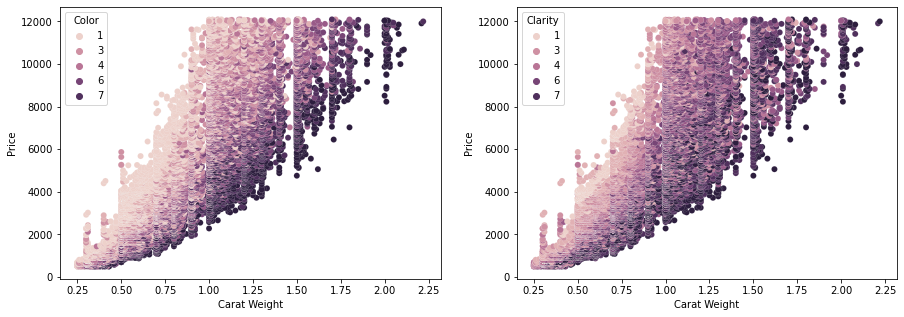

In [18]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.scatterplot(ax=ax[0],data=df,x='Carat Weight',y='Price',hue='Color',linewidth=.1)
sns.scatterplot(ax=ax[1],data=df,x='Carat Weight',y='Price',hue='Clarity',linewidth=.1)
#sns.scatterplot(ax=ax[1][0],data=df,x='Carat Weight',y='Price',hue='Cut',linewidth=.1)
#sns.scatterplot(ax=ax[1][1],data=df,x='Carat Weight',y='Price',hue='Fluorescence',linewidth=.1)

In [19]:
df['FourC'] = df['Carat Weight'] * df['Color'] * df['Clarity'] * df['Cut']
df['DT Ratio'] = df['Depth %'] / df['Table %']
df['Carat Color'] = df['Color'] ** (df['Carat Weight'])
df['Carat Clarity'] = df['Clarity'] ** (df['Carat Weight'])
df['Shine'] = df['Polish'] * df['Symmetry'] * df['Fluorescence']

In [20]:
df.to_csv('./data/bluenile_eda_new_features.csv',index=False)